<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>make sure you have all the required libraries istalled.</li>
</ul>
</p>

<img src="aden-whitfield.jpg" alt="I think Aden clicks better" title="How you take after reading it?" />

Hi Folks,<br>
Let's start the journey in Natural Language processing.<br>
I would love to hear from you guys tons of feedbacks or any further updates or techniques which can be learnt
to achieve the same purpose.
<br><br>
Ok, So first thing first.
<br>
It's been 4 years i am consistently analysing the growth of the field called **Natural Language Processing**.
<br><br>
Hawk eye view:<br>
**Data science begins from data and end up at insights and prediction with prescriptions.**
<br>
Note: That's a personal opinion.

<br>
There exist various formats of Data which has been structurised insanly for the consumption purpose.<br>
i.e.<br>
    - Strucutred Format.<br>
    - Unstructured Format<br>
    - Semi Structured Format.<br>

It doesn't matter which format data is arranged/represented into, Machine Learning models has only one litreature of data digestion.<br>
**ML algorithms are lover of mathematician nerds and ex of statisticians**
<br>Jokes apart, But that's secret <br><br><span style='font-size:100px;'>&#9787;</span> 

<br><br><br>


Since i started exploring the domain, I found learning is best by doing the experiments.
Time to roll up our sleeves and jump in.

So we are talking about Natural language processing, means text, meansans hell lot of them, means they are insanly structured, They have their own orientation, variety and junks as well.<br>
Our first concern should be how to make them / convert them to a format where our ML model can digest it and learn something.

To begin let's pickup some use case and start the expedition.

For our use case we will first try the classification of text based on their content, weather they are good or bad? 
<br>
We will be exploring how to preprocess tweets for sentiment analysis.<br>
For this exercise, we will use a Twitter dataset that comes with NLTK. This dataset has been manually annotated and serves to establish baselines for models quickly. Let us import them now as well as a few other libraries we will be using.

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import re
import string

import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [2]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [3]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

Number of positive tweets:  5000
Number of negative tweets:  5000


**Let's have visuals of the data spread**

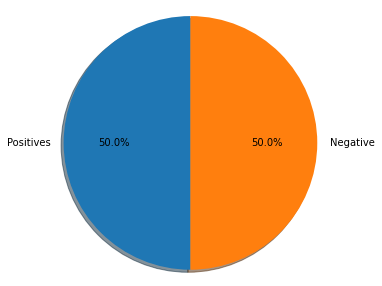

In [4]:
fig = plt.figure(figsize=(5, 5))
labels = 'Positives', 'Negative'
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  
plt.show()

**How a tweet looks like in our dataset**

In [5]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@clarelea101 Deal. I'm great with kids :)
OMG selena tweets while i was busy out :(


You see the structure of the data, amazing it is. Isn't it?<br>
It is schemaless, unstructured, but have meaningful information with it.<br>
How can we make this dataset so that our ML model will be able to consume it?<br>

it has emoticons as well, some special chars gives extra value to the meaning which we understand, LOL.
<br>
Let's clean the mess up, and later we will torture it to reveal things.

## Preprocessing

We would do everything possible to make it kneel down against our ML Model.
What ops can we do against this stubborn structured data.
- remove stopwords, special chars.
- ground high grammar words to their roots.

Ok, Python is Royal in terms of libraries, You wanna do rocket science, you will never strive for a library in python.

Below are the handy functions we can use for data preproessing.

In [6]:
#to process a tweet,i.e. puntuation removal,stemming etc. 
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation): # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


# building vocabulary with term frequency.
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs


Finally we have to split our dataset into Train, Test sections.
<p>

In [7]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

## Feature Extraction

In [71]:
def extract_features(tweet, freqs,flag):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 4)) 
    
    #bias term is set to 1
    x[0,0] = 1
    if flag == 1:
        x[0,3]=1
    else:
        x[0,3]=0
        
    # loop through each word in the list of words
    for word in word_l:
        # increment the word count for the positive label 1
        x[0,1] += len([1 for key, value in freqs.items() if word==key[0]and key[1]==1])
        
        # increment the word count for the negative label 0
        x[0,2] += len([1 for key, value in freqs.items() if word==key[0]and key[1]==0])
        
    return x

We would be having our feature space as 3 vectors and one target variable.
<br>
**Let's test the feature extraction logic.**

In [9]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

tmp1 = extract_features(all_positive_tweets[random.randint(0,5000)], freqs)
print(tmp1)

[[ 1. 10.  8.]]


Time to club the feature matrix with their coresponding labels.

In [80]:
def dataMaker(all_positive_tweets,all_negative_tweets):

    extracted_pos_feature = []
    for tweet in all_positive_tweets:
        feature = extract_features(tweet,freqs,1)
        extracted_pos_feature.append(feature[0])
        
    extracted_neg_feature = []
    for tweet in all_negative_tweets:
        feature = extract_features(tweet,freqs,0)
        extracted_neg_feature.append(feature[0])
        
    return extracted_pos_feature,extracted_neg_feature

In [81]:
pos,neg = dataMaker(all_positive_tweets,all_negative_tweets)

In [83]:
pos_df = pd.DataFrame(pos)
neg_df = pd.DataFrame(neg)

In [84]:
featured_tweet_data = pd.concat([pos_df,neg_df],axis=0)

In [86]:
featured_tweet_data.head(n=10)

,0,1,2,3
0,1.0,7.0,5.0,1.0
1,1.0,14.0,12.0,1.0
2,1.0,8.0,8.0,1.0
3,1.0,2.0,2.0,1.0
4,1.0,15.0,8.0,1.0
5,1.0,4.0,2.0,1.0
6,1.0,12.0,11.0,1.0
7,1.0,14.0,14.0,1.0
8,1.0,5.0,3.0,1.0
9,1.0,14.0,6.0,1.0


In [87]:
featured_tweet_data.tail(n=10)

,0,1,2,3
4990,1.0,4.0,4.0,0.0
4991,1.0,4.0,3.0,0.0
4992,1.0,5.0,4.0,0.0
4993,1.0,5.0,5.0,0.0
4994,1.0,4.0,4.0,0.0
4995,1.0,4.0,4.0,0.0
4996,1.0,3.0,4.0,0.0
4997,1.0,4.0,4.0,0.0
4998,1.0,3.0,3.0,0.0
4999,1.0,3.0,4.0,0.0


In [89]:
featured_tweet_data.columns = ["Bias","Pos_Count","Neg_Count","Tag"]

In [90]:
x = featured_tweet_data[["Bias","Pos_Count","Neg_Count"]]
y = featured_tweet_data["Tag"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [93]:
y_test

1252    0.0
4684    1.0
1731    1.0
4742    1.0
4521    1.0
       ... 
1412    0.0
3285    0.0
2853    0.0
1095    1.0
1929    0.0
Name: Tag, Length: 2000, dtype: float64

In [98]:
y_pred = model.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

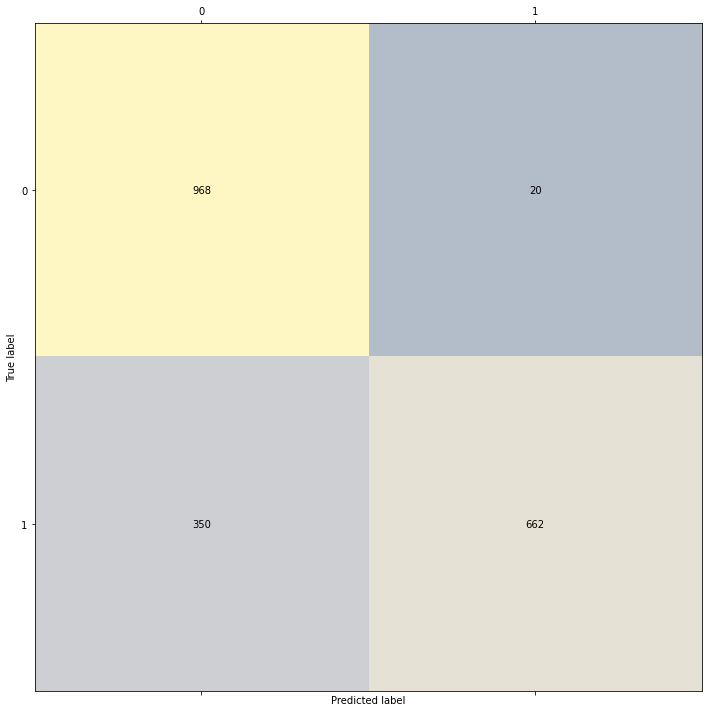

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confmat, cmap=plt.cm.cividis, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()